In [2]:
import numpy as np
z= np.arange(-10,10,0.01)
g= 1/(1+np.exp(-z))

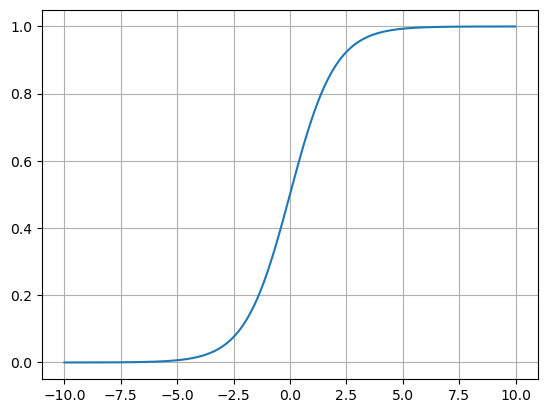

In [4]:
import matplotlib.pyplot as plt

plt.plot(z,g)
plt.grid()
plt.show()

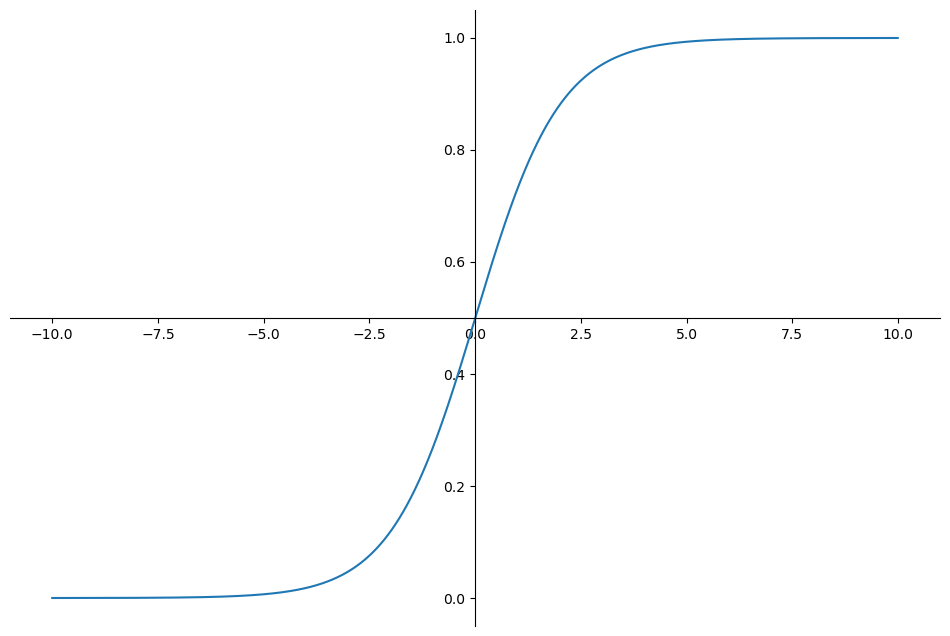

In [9]:
plt.figure(figsize=(12,8))
ax = plt.gca()

ax.plot(z,g)
ax.spines['left'].set_position('zero')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

plt.show()

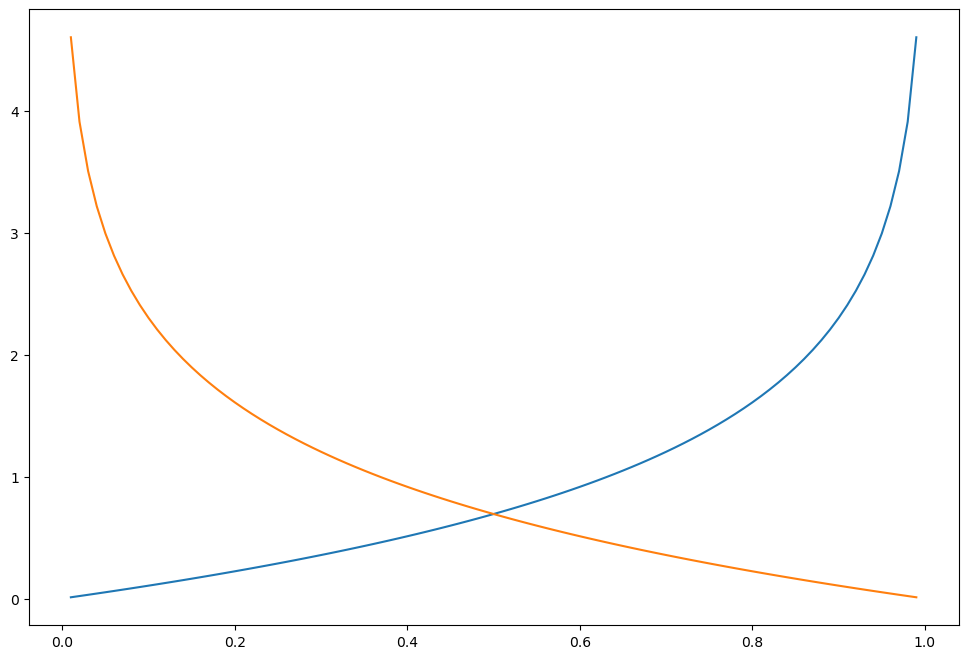

In [10]:
h = np.arange(0.01,1,0.01)

C0 = -np.log(1-h)
C1 = -np.log(h)

plt.figure(figsize=(12,8))
plt.plot(h,C0,label='y=0')
plt.plot(h,C1,label='y=1')

plt.show()

In [11]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'
wine = pd.read_csv(wine_url, index_col=0)
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [12]:
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste','quality'], axis=1)
Y = wine['taste']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1234)

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
lr = LogisticRegression(solver='liblinear', random_state=1234)
lr.fit(X_train, y_train)


LogisticRegression(random_state=1234, solver='liblinear')

In [17]:
y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print('Train Acc : ', accuracy_score(y_train,y_pred_tr))
print('Test Acc : ', accuracy_score(y_test,y_pred_test))

Train Acc :  0.7373484702713103
Test Acc :  0.7576923076923077


In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [19]:
estimators = [
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=1234))
]

pipe = Pipeline(estimators)

In [20]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 LogisticRegression(random_state=1234, solver='liblinear'))])

In [21]:
y_pred_tr = pipe.predict(X_train)
y_pred_test = pipe.predict(X_test)

print('Train Acc : ', accuracy_score(y_train,y_pred_tr))
print('Test Acc : ', accuracy_score(y_test,y_pred_test))

Train Acc :  0.7394650760053877
Test Acc :  0.7584615384615384


In [22]:
from sklearn.tree import DecisionTreeClassifier

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=1234)
wine_tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=1234)

In [23]:
models = {
    'logistic regression' : pipe,
    'decision tree' : wine_tree
}

In [25]:
from sklearn.metrics import roc_curve

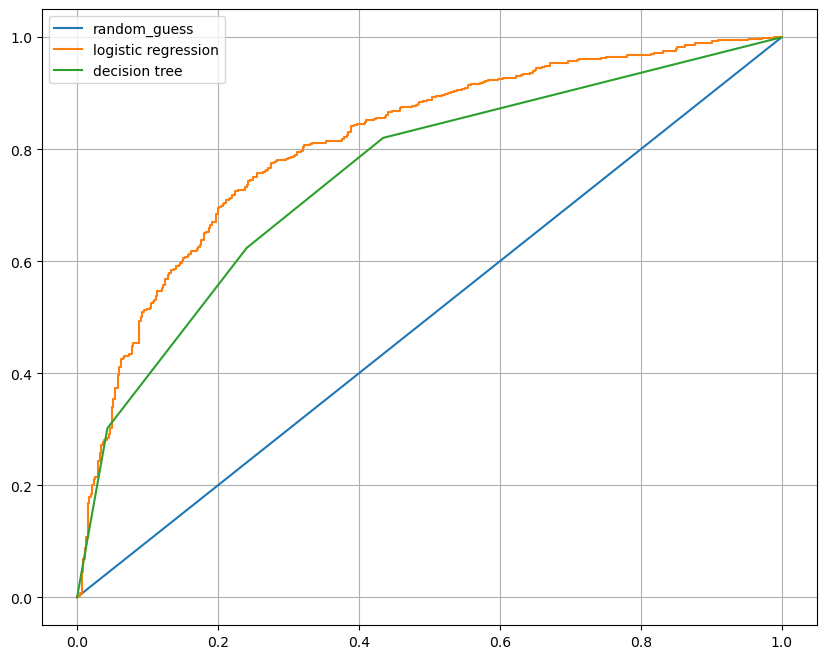

In [28]:
plt.figure(figsize=(10,8))
plt.plot([0,1],[0,1], label='random_guess')


for model_name, model in models.items():
    pred = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test,pred)

    plt.plot(fpr, tpr,label=model_name)

plt.grid()
plt.legend()
plt.show()

In [2]:
import pandas as pd

PIMA_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'
PIMA = pd.read_csv(PIMA_url)
PIMA.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
PIMA = PIMA.astype('float')
PIMA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


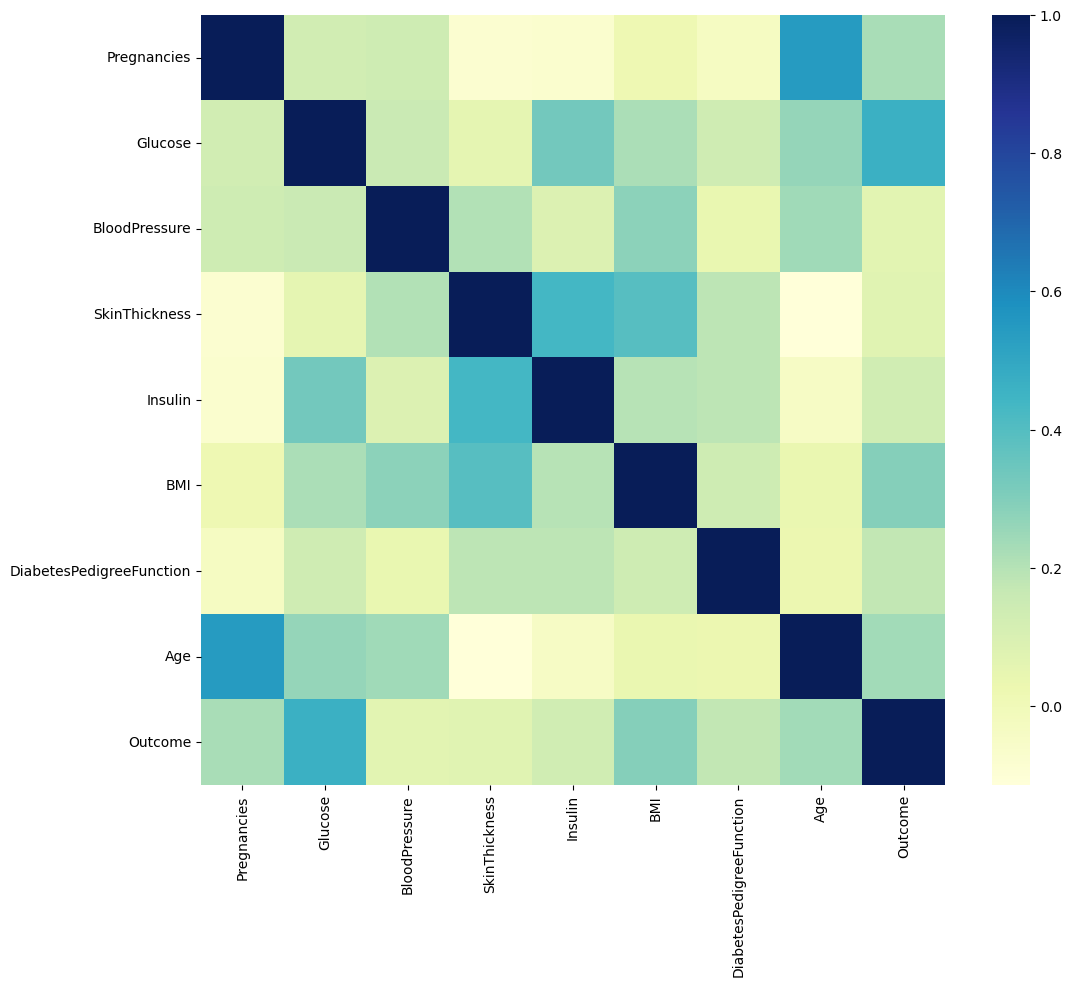

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.heatmap(PIMA.corr(),cmap='YlGnBu')
plt.show()

In [9]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [10]:
zero_features = ['Glucose','BloodPressure','SkinThickness','BMI']
PIMA[zero_features] = PIMA[zero_features].replace(0,PIMA[zero_features].mean())

In [11]:
(PIMA==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X = PIMA.drop(['Outcome'],axis=1)
y = PIMA['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=1234)

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
estimators = [
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(solver='liblinear',random_state=1234))
]

pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred =pipe_lr.predict(X_test)

In [18]:
from sklearn.metrics import accuracy_score,recall_score,precision_score
from sklearn.metrics import roc_auc_score, f1_score

In [19]:
print('Accuracy : ',accuracy_score(y_test,pred))
print('Recall : ',recall_score(y_test,pred))
print('Precision : ',precision_score(y_test,pred))
print('AUC score : ',roc_auc_score(y_test,pred))
print('F1 score : ',f1_score(y_test,pred))

Accuracy :  0.8311688311688312
Recall :  0.6481481481481481
Precision :  0.8333333333333334
AUC score :  0.7890740740740739
F1 score :  0.7291666666666669


In [26]:
coef=list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)

In [24]:
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [27]:
features = pd.DataFrame({'Features' : labels, 'importance':coef})
features.sort_values(by=['importance'],ascending=True, inplace=True)

In [28]:
features

,Features,importance
4,Insulin,-0.195932
2,BloodPressure,-0.125208
3,SkinThickness,0.037495
7,Age,0.054932
6,DiabetesPedigreeFunction,0.319621
0,Pregnancies,0.433741
5,BMI,0.658439
1,Glucose,1.115586


In [29]:
features['positive'] = features['importance']>0

In [30]:
features.set_index('Features', inplace=True)

In [31]:
features

,importance,positive
Features,,
Insulin,-0.195932,False
BloodPressure,-0.125208,False
SkinThickness,0.037495,True
Age,0.054932,True
DiabetesPedigreeFunction,0.319621,True
Pregnancies,0.433741,True
BMI,0.658439,True
Glucose,1.115586,True


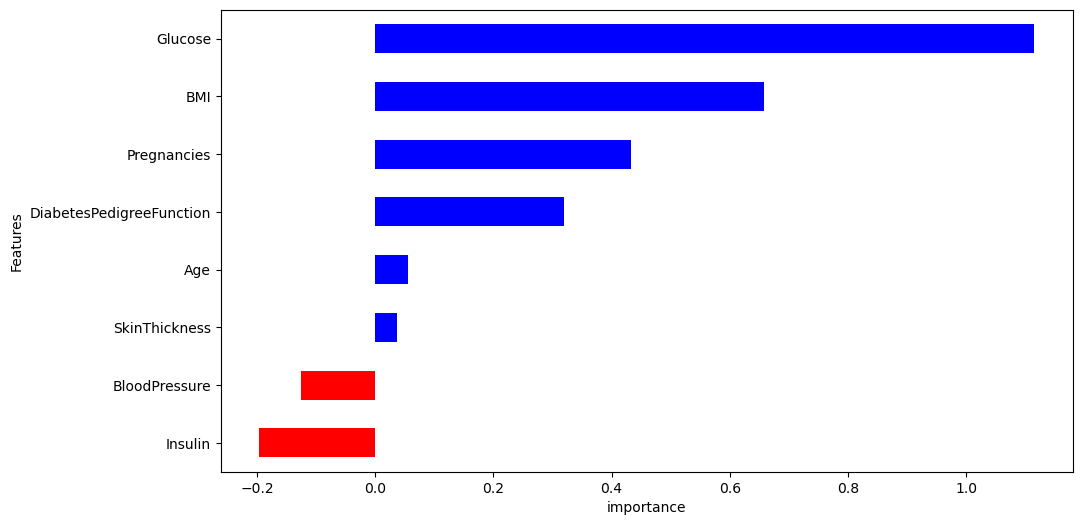

In [32]:
features['importance'].plot(kind='barh',
                            figsize=(11,6),
                            color=features['positive'].map({True:'blue', False:'red'})
)

plt.xlabel('importance')
plt.show()